In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load dataset
dataset = load_dataset("amazon_polarity")

# Convert to DataFrame (small subset for demo)
train_df = pd.DataFrame(dataset['train'].shuffle(seed=42).select(range(6000)))

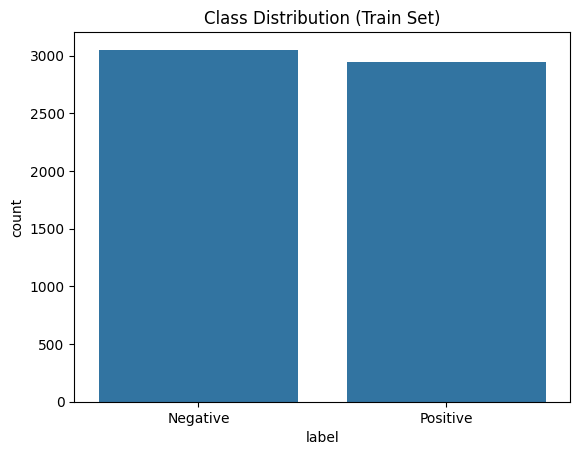

In [9]:
# Class distribution
sns.countplot(x='label', data=train_df)
plt.title('Class Distribution (Train Set)')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

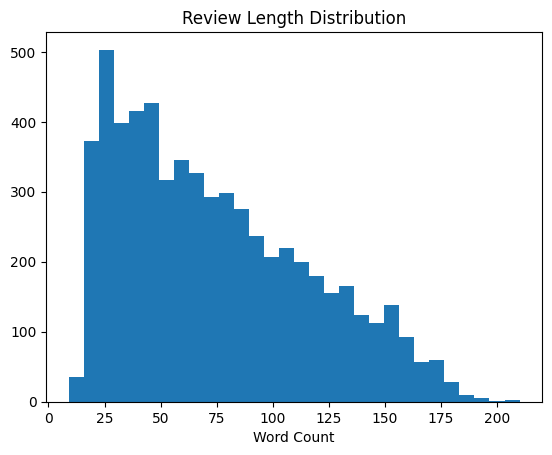

In [10]:
# Review lengths
train_df['review_length'] = train_df['content'].apply(lambda x: len(x.split()))
plt.hist(train_df['review_length'], bins=30)
plt.title('Review Length Distribution')
plt.xlabel('Word Count')
plt.show()

In [11]:
# Remove duplicates and very short reviews
train_df = train_df.drop_duplicates(subset='content')
train_df = train_df[train_df['review_length'] >= 5]

# Save cleaned data
train_df.to_csv("../data/cleaned_data.csv", index=False)